In [2]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from glob import glob
from os.path import join
from scipy.stats import norm
from time import time

sns.set(style='ticks')
sns.set_context('paper', font_scale=1.2)

# Plots

The figures below show estimate of arm values in the two-arm setting discussed in the introduction. 

That is, select data uniformly for T/2 periods, then select the arm with highest sample mean 90\% of the time for T/2 periods.

We show estimates of the sample mean, ipw estimator, and adaptively-weighted estimator with constant allocation, for $T = 10^6$.

<!-- **NOTE** I believe the introduction currently shows the empirical distribution of $\sqrt{T} \widehat{Q}_T^{AVG}$ and $\sqrt{T} \widehat{Q}_T^{IPW}$. 

But do we really care about that quantity? 

+ The IPW estimator seemingly has very fat tails, but as the plots below show if we studentize it we get something much more thin-tailed. 

+ In fact, as the last plot shows, when scaled by $\sqrt{T}$ the errors of the adaptively weighted estimator are also not normal and look a lot like IPW.

+ For large $T$, the sample average bias is very small. Recall that the sample average is consistent as long as $T_w \xrightarrow{p} \infty$, which is satisfied in the intro example. -->

----

Loading simulation data (please run `intro_example_simulations.ipynb` first).

In [2]:
data = []
for file in glob('results/*.pkl'):
    try:
        data.append(pd.read_pickle(file))
    except:
        print(f"Error reading {file}")
        
data = pd.concat(data, ignore_index=True, sort=False)

Path to where figures should be saved

In [1]:
path = 'figures/'

----

## Plotting "studentized statistics": $(\widehat{Q}_T - 0)/\sqrt{\widehat{V}}_T$

Including IPW, sample mean and adaptively-weighted (constant alloc).

**Solid blue line is N(0, 1).**

**Dotted line is empirical average of $\hat{Q}_T$ across simulations (note: <u>not</u> the empirical average of the studentized statistic).**

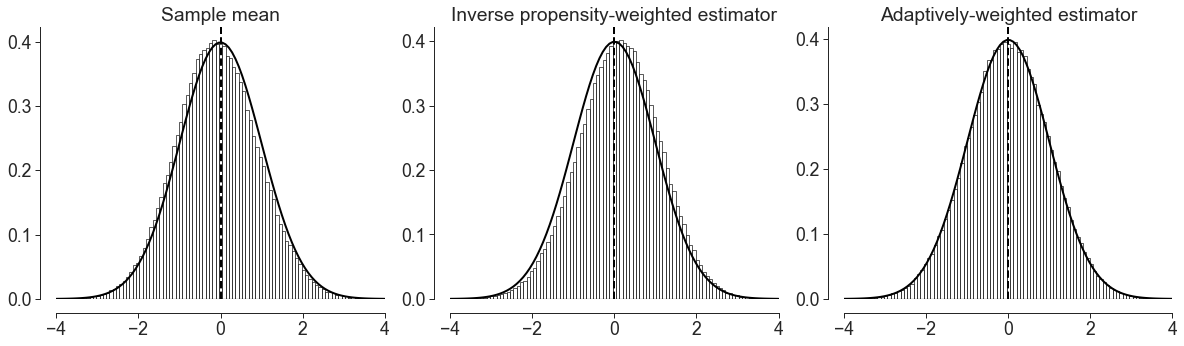

In [129]:
students = ['avg_student', 'ipw_student', 'aw_student']
estimates = ['avg_estimate', 'ipw_estimate', 'aw_estimate']
titles = ['Sample mean', 'Inverse propensity-weighted estimator', 'Adaptively-weighted estimator']
xs = np.linspace(-4, 4, 100)

fig, axs = plt.subplots(1, 3, figsize=(20, 5),  dpi=72, facecolor="white")

for ax, student, estimate, title in zip(axs, students, estimates, titles):
    
    with sns.plotting_context('paper', font_scale=2):
        y = data[student].values
        y_est = data[estimate].values
        ax.hist(y, bins=xs, density=True, alpha=.8, facecolor='white', edgecolor='black');
        ax.plot(xs, norm().pdf(xs), color='black', linestyle='-', linewidth=2)
        ax.axvline(np.mean(y_est), color="black", linestyle="--", linewidth=2)
        ax.set_title(title)

        # styling
        ax.spines['bottom'].set_position(('axes', -0.05))
        ax.yaxis.set_ticks_position('left')
        ax.spines['left'].set_position(('axes', -0.05))
        ax.axhline(0, color='black')
        ax.set_xlim(xs[0], xs[-1])

sns.despine()


fig.savefig(join(f'{path}', 'intro_example_studentized.pdf'))

-----

## Plotting scaled error: $\sqrt{T} \cdot (\widehat{Q}_T - 0)$

The first two plots here are what we have in the introduction, although for a larger $T$ (I think).

**Solid blue line is Normal distribution fitted to the distribution of $\sqrt{T}(\widehat{Q}_T - 0)$. Dotted line is empirical average of $\sqrt{T} \hat{Q}_T$ across simulations.**

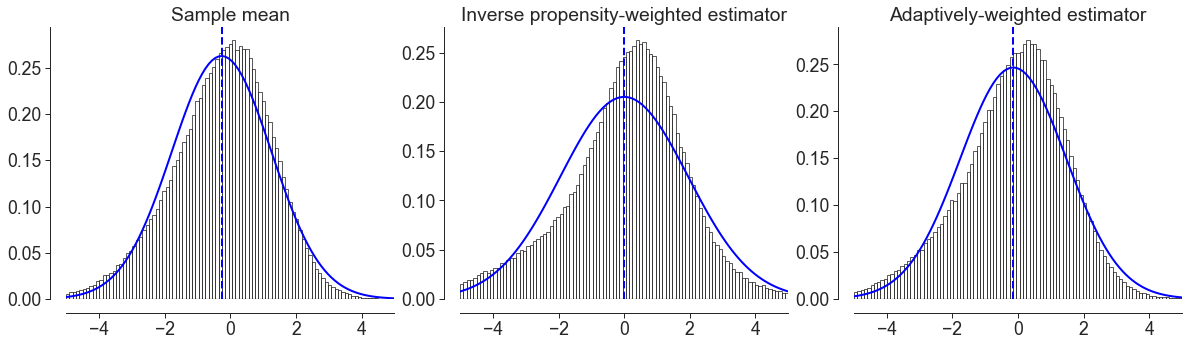

In [128]:
columns = ['avg_estimate', 'ipw_estimate', 'aw_estimate']
titles = ['Sample mean', 'Inverse propensity-weighted estimator', 'Adaptively-weighted estimator']
T = data['T'].iloc[0]
xs = np.linspace(-5, 5, 100)

fig, axs = plt.subplots(1, 3, figsize=(20, 5),  dpi=72, facecolor="white")

for ax, column, title in zip(axs, columns, titles):
    
    with sns.plotting_context('paper', font_scale=2):

        y = np.sqrt(T) * data[column].values # scaling!
        ax.hist(y, bins=xs, density=True, alpha=.8, facecolor='white', edgecolor='black');
        ax.plot(xs, norm(y.mean(), y.std()).pdf(xs), color='blue', linestyle='-', linewidth=2)
        ax.axvline(np.mean(y), color="blue", linestyle="--", linewidth=2)
        ax.set_title(title)

        # styling
        ax.spines['bottom'].set_position(('axes', -0.05))
        ax.yaxis.set_ticks_position('left')
        ax.spines['left'].set_position(('axes', -0.05))
        ax.axhline(0, color='black')
        ax.set_xlim(xs[0], xs[-1])

    
sns.despine()

fig.savefig(join(f'{path}', 'intro_example_complete.pdf'))

Important to note how at $T = 10^{6}$ the bias of the sample mean is very small, albeit statistically significant from zero.

----

Extra: Introduction plot containing only the first two estimators above.

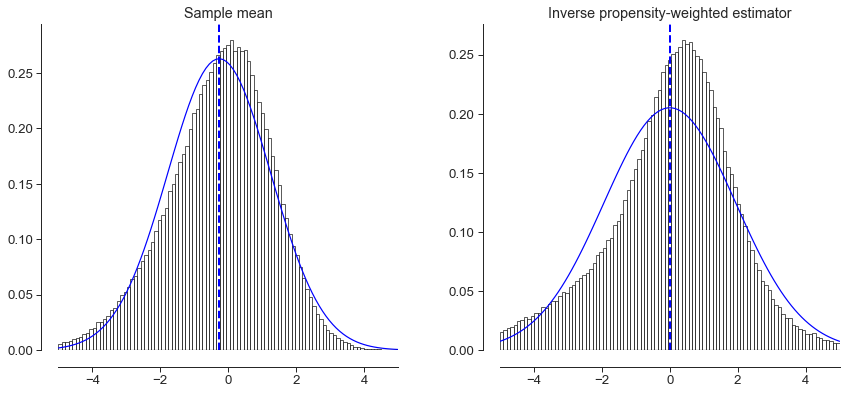

In [108]:
columns = ['avg_estimate', 'ipw_estimate']
titles = ['Sample mean', 'Inverse propensity-weighted estimator']
T = data['T'].iloc[0]
xs = np.linspace(-5, 5, 100)

fig, axs = plt.subplots(1, 2, figsize=(14, 6),  dpi=72, facecolor="white")

for ax, column, title in zip(axs, columns, titles):
    
    y = np.sqrt(T) * data[column].values # scaling!
    ax.hist(y, bins=xs, density=True, alpha=.8, facecolor='white', edgecolor='black');
    ax.plot(xs, norm(y.mean(), y.std()).pdf(xs), color='blue', linestyle='-')
    ax.axvline(np.mean(y), color="blue", linestyle="--", linewidth=2)
    ax.set_title(title)

    # styling
    ax.spines['bottom'].set_position(('axes', -0.05))
    ax.yaxis.set_ticks_position('left')
    ax.spines['left'].set_position(('axes', -0.05))
    ax.axhline(0, color='black')
    ax.set_xlim(xs[0], xs[-1])
    
    
sns.despine()

fig.subplots_adjust(wspace=.3)
fig.savefig(join(f'{path}', 'intro_example.pdf'))